In [349]:
import os
import numpy as np

clus_GZ = '../data/compressed/input_clus_radar/'
clus_RAW = '../data/uncompressed/input_clus_radar'

In [568]:
def unzip(path):
    for file in os.listdir(path):
        !bash unzip_file.sh {file}
        
def readDataClus(path):
    icr = {}
    for file in os.listdir(path):
        input_clus_radar = np.fromfile('../data/uncompressed/input'+file,dtype='float32')
        input_clus_radar = np.array(input_clus_radar)
        input_clus_radar = np.reshape(input_clus_radar, (241,241))
        ans[file] = [input_clus_radar, "coords"]
    return icr

def getCoords(cluster):
    x = 0
    y = 0
    vx = []
    vy = []

    for i in range(len(cluster)):
        for j in range(len(cluster)):
            if cluster[x][y] != 0:
                vx.append(x)
                vy.append(y)
            y += 1
        x += 1
        y = 0
        
    return vx,vy

In [458]:
unzip(clus_GZ)

FileNotFoundError: [Errno 2] No such file or directory: '../data/compressed/input_clus_radar/'

In [300]:
dados = readData(RAW)

In [455]:
k = list(dados.keys())
cluster = dados[k[0]][0]

In [456]:
dados

{'R12345678_201402012324.raw.gz': [array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]}

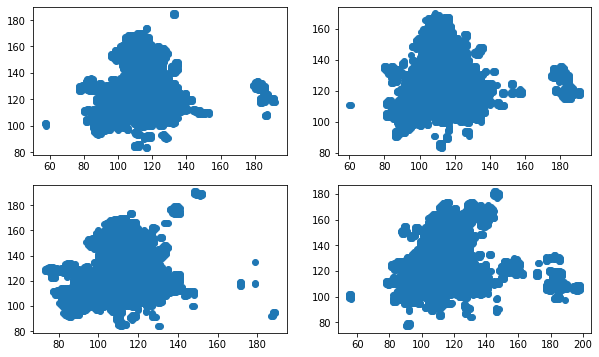

In [297]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2,2, figsize=(10,6))

kk = []
for cluster in dados.keys():
    kk.append(getCoords(dados[cluster][0]))
    
ax[0][0].scatter(kk[0][0], kk[0][1])

ax[0][1].scatter(kk[1][0], kk[1][1])
# ax[0][1].scatter()

ax[1][0].scatter(kk[2][0], kk[2][1])
# ax[1][0].scatter()

ax[1][1].scatter(kk[3][0], kk[3][1])
# ax[1][1].scatter()

plt.show()

In [332]:
#comp = np.fromfile('../data/compressed/input_img_radar/R12345678_201402010000.raw.gz',dtype='float32')
uncomp = np.fromfile('../data/uncompressed/input_img_radar/R12345678_201402010000.raw',dtype='float32')

In [333]:
uncomp

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

V = 20, X = 46, Y = 88
V = 20, X = 46, Y = 92
V = 20, X = 46, Y = 93
V = 21, X = 47, Y = 86
V = 21, X = 47, Y = 87
V = 20, X = 47, Y = 88
V = 21, X = 47, Y = 89
V = 21, X = 47, Y = 90
V = 20, X = 47, Y = 91
V = 20, X = 47, Y = 92
V = 20, X = 47, Y = 93
V = 20, X = 48, Y = 87
V = 20, X = 48, Y = 88
V = 20, X = 48, Y = 89
V = 22, X = 48, Y = 90
V = 22, X = 48, Y = 91
V = 22, X = 48, Y = 92
V = 20, X = 48, Y = 93
V = 20, X = 48, Y = 94
V = 20, X = 48, Y = 95
V = 20, X = 49, Y = 87
V = 20, X = 49, Y = 88
V = 21, X = 49, Y = 89
V = 24, X = 49, Y = 90
V = 24, X = 49, Y = 91
V = 23, X = 49, Y = 92
V = 21, X = 49, Y = 93
V = 22, X = 49, Y = 94
V = 22, X = 49, Y = 95
V = 20, X = 50, Y = 87
V = 20, X = 50, Y = 88
V = 20, X = 50, Y = 89
V = 20, X = 50, Y = 90
V = 23, X = 50, Y = 91
V = 24, X = 50, Y = 92
V = 24, X = 50, Y = 93
V = 25, X = 50, Y = 94
V = 22, X = 50, Y = 95
V = 24, X = 50, Y = 96
V = 19, X = 51, Y = 88
V = 19, X = 51, Y = 89
V = 20, X = 51, Y = 90
V = 21, X = 51, Y = 91
V = 22, X =

V = 6, X = 140, Y = 111
V = 6, X = 140, Y = 112
V = 7, X = 140, Y = 113
V = 8, X = 140, Y = 114
V = 10, X = 140, Y = 115
V = 12, X = 140, Y = 116
V = 14, X = 140, Y = 117
V = 17, X = 140, Y = 118
V = 20, X = 140, Y = 119
V = 19, X = 140, Y = 120
V = 16, X = 140, Y = 121
V = 12, X = 140, Y = 122
V = 8, X = 140, Y = 123
V = 6, X = 140, Y = 124
V = 6, X = 140, Y = 125
V = 6, X = 141, Y = 111
V = 6, X = 141, Y = 112
V = 8, X = 141, Y = 113
V = 10, X = 141, Y = 114
V = 11, X = 141, Y = 115
V = 13, X = 141, Y = 116
V = 15, X = 141, Y = 117
V = 18, X = 141, Y = 118
V = 20, X = 141, Y = 119
V = 20, X = 141, Y = 120
V = 18, X = 141, Y = 121
V = 16, X = 141, Y = 122
V = 11, X = 141, Y = 123
V = 7, X = 141, Y = 124
V = 6, X = 141, Y = 125
V = 17, X = 141, Y = 175
V = 6, X = 142, Y = 111
V = 6, X = 142, Y = 112
V = 7, X = 142, Y = 113
V = 9, X = 142, Y = 114
V = 11, X = 142, Y = 115
V = 15, X = 142, Y = 116
V = 17, X = 142, Y = 117
V = 18, X = 142, Y = 118
V = 19, X = 142, Y = 119
V = 20, X = 142,

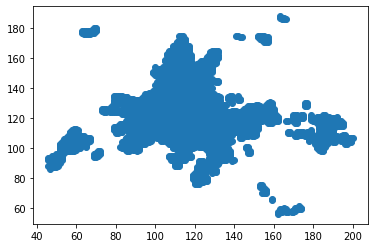

In [561]:
import gzip

f = gzip.GzipFile('../data/input_img_radar/R12345678_201402010000.raw.gz')
event_dtype = np.dtype('float32')
s = f.read()
event = np.frombuffer(s, dtype=event_dtype)

dados = np.array(event)
dados = np.reshape(dados, (241,241))

vx, vy = [], []
x, y = 0, 0
for i in range(241):
    for j in range(241):
        if dados[x][y] != 0:
            vx.append(x)
            vy.append(y)
            print('V = %d, X = %d, Y = %d'%(dados[x][y], x, y))
        y += 1
    x+=1
    y=0
plt.scatter(vx,vy)

In [352]:
import os
import numpy as np
import gzip

In [362]:
PATH = '../data'

In [613]:
def readRef(path):
    ans = {}
    for file in os.listdir(path+'/input_img_radar'):
        f = gzip.GzipFile(path+'/input_img_radar/'+(file))
        event_dtype = np.dtype('float32')
        s = f.read()
        event = np.frombuffer(s, dtype=event_dtype)
        dados = np.array(event)
        dados = np.reshape(dados, (241,241))
        ans[file] = [dados]      
    return ans

def getCoords(coords):
    vx, vy = [], []
    x, y = 0, 0
    
    coords[x][y]
#     for i in range(241):
#         for j in range(241):
#             if coords[x][y] != 0:
#                 vx.append(x)
#                 vy.append(y)
#                 print('V = %d, X = %d, Y = %d'%(coords[x][y], x, y))
#             y += 1
#     x+=1
#     y=0

In [614]:
ref = readRef(PATH)

k = list(ref.keys())
mat = ref[k[0]][0]
mat

# getCoords(ref)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [612]:
k = list(ref.keys())
cluster = ref[k[0]][0]
cluster


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [581]:
list(ref.keys())


['R12345678_201402012324.raw.gz',
 'R12345678_201402011524.raw.gz',
 'R12345678_201402012300.raw.gz',
 'R12345678_201402021412.raw.gz',
 'R12345678_201402012112.raw.gz',
 'R12345678_201402021636.raw.gz',
 'R12345678_201402020224.raw.gz',
 'R12345678_201402012036.raw.gz',
 'R12345678_201402020500.raw.gz',
 'R12345678_201402021600.raw.gz',
 'R12345678_201402011212.raw.gz',
 'R12345678_201402010336.raw.gz',
 'R12345678_201402020536.raw.gz',
 'R12345678_201402020436.raw.gz',
 'R12345678_201402011612.raw.gz',
 'R12345678_201402010112.raw.gz',
 'R12345678_201402021112.raw.gz',
 'R12345678_201402020748.raw.gz',
 'R12345678_201402021400.raw.gz',
 'R12345678_201402010736.raw.gz',
 'R12345678_201402021236.raw.gz',
 'R12345678_201402010124.raw.gz',
 'R12345678_201402020236.raw.gz',
 'R12345678_201402021836.raw.gz',
 'R12345678_201402020800.raw.gz',
 'R12345678_201402020700.raw.gz',
 'R12345678_201402022200.raw.gz',
 'R12345678_201402011824.raw.gz',
 'R12345678_201402022348.raw.gz',
 'R12345678_20